In [18]:
!pip install youtube-comment-downloader > /dev/null
!pip install nltk > /dev/null
!pip install seaborn > /dev/null

## Descargando Comentarios del Video

In [2]:
from youtube_comment_downloader import *
from itertools import islice

cid=[]
text=[]
time =[]
author=[]
channel=[]
votes =[]
photo=[]
heart=[]
reply=[]
time_parsed=[]
x=0

downloader = YoutubeCommentDownloader()
comments=downloader.get_comments_from_url("https://www.youtube.com/watch?v=bWr-DA5Wjfw",sort_by=SORT_BY_RECENT)
for comment in islice(comments,3000):
    cid.append(comment['cid'])
    text.append(comment['text'])
    time.append(comment['time'])
    author.append(comment['author'])
    channel.append(comment['channel'])
    votes.append(comment['votes'])
    photo.append(comment['photo'])
    heart.append(comment['heart'])
    reply.append(comment['reply'])
    time_parsed.append(comment['time_parsed'])
    x=x+1
    # print(x) 

In [3]:
import pandas as pd

db = {  'cid': cid,
        'text': text,
        'time': time,
        'author': author,
        'channel': channel,
        'votes': votes,
        'photo': photo,
        'heart': heart,
        'reply': reply,
        'time_parsed': time_parsed
     }

df = pd.DataFrame(db)

Guardamos los datos en un archivo para que en el futuro no tengamos que volver a descargar todos los comentarios

In [4]:
df.to_csv("test.csv")

## Limpieza de textos

In [5]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
column_name = 'text'
text_column = df[column_name]

all_words = []
for text in text_column:
    words = word_tokenize(text)
    all_words.extend(words)

In [7]:
len(all_words)

81151

In [8]:
all_words[0:10]

['There',
 'are',
 'many',
 'AI',
 'skeptics',
 'and',
 'overcomers',
 'realising',
 'what',
 "'s"]

In [32]:
import string
string.punctuation+= '’'

In [33]:
import string
def words_normalized(word):
    return word.translate(str.maketrans('', '',  string.punctuation)).lower()

words_without_punctuation = [words_normalized(x) for x in all_words]

In [34]:
words_without_punctuation[0:10]

['there',
 'are',
 'many',
 'ai',
 'skeptics',
 'and',
 'overcomers',
 'realising',
 'what',
 's']

In [35]:
nltk_frequencia = nltk.FreqDist(words_without_punctuation)
nltk_frequencia

FreqDist({'': 9521, 'the': 2690, 'to': 1714, 'and': 1553, 'is': 1450, 'a': 1360, 'he': 1262, 'of': 1253, 'i': 1166, 'it': 1070, ...})

Quitar Stopwords o palabras que no aportan mucho significado

In [36]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_ = stopwords.words('english')
stopwords_

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
otras_palabras_ruido = ['would', 'also', 'could']
palabras_no_van = stopwords_ + otras_palabras_ruido

nltk_limpio = []

for n in words_without_punctuation:
    if n and n not in palabras_no_van:
        nltk_limpio.append(n)


In [41]:
len(nltk_limpio)

36893

## Explorando datos

Graficación de las frequencias

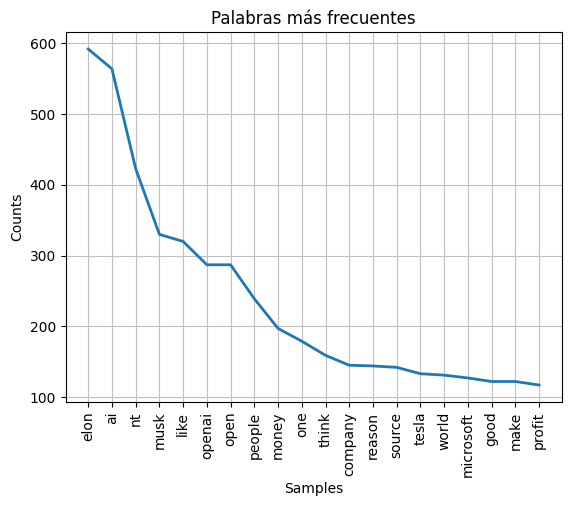

<Axes: title={'center': 'Palabras más frecuentes'}, xlabel='Samples', ylabel='Counts'>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import FreqDist


freq_dist = nltk.FreqDist(nltk_limpio)

freq_dist.plot(20, title='Palabras más frecuentes')

In [28]:
freq_dist.most_common(20)

[('elon', 592),
 ('ai', 564),
 ('nt', 423),
 ('musk', 330),
 ('like', 320),
 ('openai', 287),
 ('open', 287),
 ('people', 239),
 ('money', 197),
 ('one', 179),
 ('think', 159),
 ('company', 145),
 ('reason', 144),
 ('source', 142),
 ('tesla', 133),
 ('world', 131),
 ('microsoft', 127),
 ('also', 123),
 ('good', 122),
 ('make', 122)]

In [57]:
freq_dist.most_common(20)[:]

[('elon', 592),
 ('ai', 564),
 ('nt', 423),
 ('musk', 330),
 ('like', 320),
 ('openai', 287),
 ('open', 287),
 ('people', 239),
 ('money', 197),
 ('one', 179),
 ('think', 159),
 ('company', 145),
 ('reason', 144),
 ('source', 142),
 ('tesla', 133),
 ('world', 131),
 ('microsoft', 127),
 ('good', 122),
 ('make', 122),
 ('profit', 117)]

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

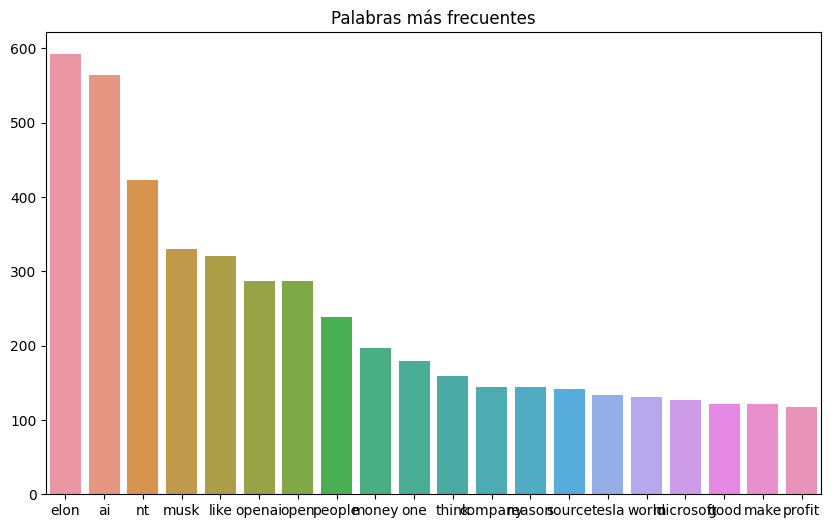

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in freq_dist.most_common(20)], y=[x[1] for x in  freq_dist.most_common(20)])
plt.title('Palabras más frecuentes')
plt.show()


Nube de palabras

In [62]:
!pip install wordcloud > /dev/null

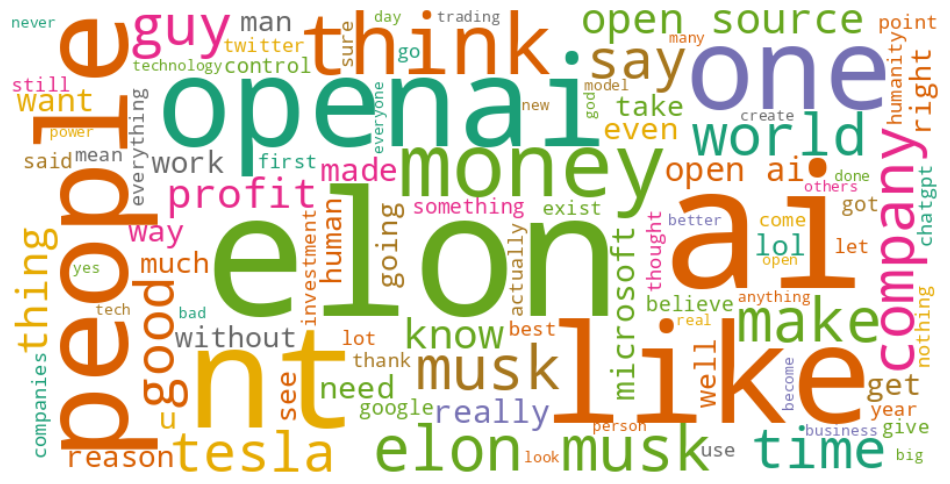

In [67]:
from wordcloud import WordCloud

text = ' '.join(nltk_limpio)

wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color='white', colormap='Dark2',
                      stopwords=stopwords_).generate(text)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


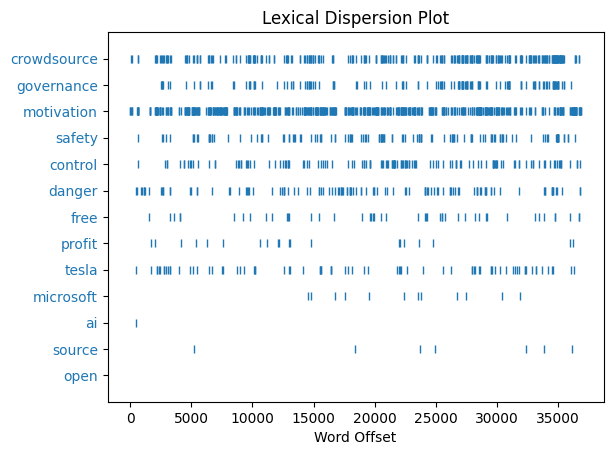

In [83]:
tokens_nltk = nltk.Text(nltk_limpio)
tokens_nltk.dispersion_plot(['open', 'source', 'ai', 'microsoft', 'tesla', 'profit', 'free', 'danger', 'control', 'safety', 'motivation', 'governance', 'crowdsource'])


In [82]:
tokens_nltk.concordance('source')

Displaying 25 of 142 matches:
ũng ho theo companies switch closed source profit open sourced nonprofit nothi
le moved nt anticipate going closed source profit becoming successful despite 
ts 1000 nothing worry though closed source simply compete open source seen met
h closed source simply compete open source seen meta ai got leaked github with
ing thing right arm non profit open source 123 software ai gpt text input tote
ble control dangers ai develop open source irresponsible glad grew portfolio 1
evelopers released things free open source profit organization turn around mak
h nt take genie bottle ai yeah open source something powerful probs isnt best 
 god overlord please make sure open source nonprofit healthy ai governance equ
us satanic world kings talking open source openai become privately owned probl
problem right beginning openai open source say stutters hes thinking new busin
ft openai noble reason believe open source vision nonprofit ai elon elon long 
irony strong let us cr